In [152]:
#import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score,accuracy_score
from scipy import stats
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score  
from sklearn.model_selection import GridSearchCV
import pandas as pd
import statsmodels.api as sm
import pylab as pl
from sklearn.model_selection import train_test_split
from scipy import stats

In [153]:
#reading the train dataset

df=pd.read_csv('census_income_learn.csv')

#reading the test dataset
df1=pd.read_csv('census_income_test.csv')

In [154]:
#view train set 

df.head()

,73,Not in universe,0,0.1,High school graduate,0.2,Not in universe.1,Widowed,Not in universe or children,Not in universe.2,...,United-States,United-States.1,United-States.2,Native- Born in the United States,0.7,Not in universe.8,2,0.8,95,- 50000.
0,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
1,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
2,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
3,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,48,Private,40,10,Some college but no degree,1200,Not in universe,Married-civilian spouse present,Entertainment,Professional specialty,...,Philippines,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,95,- 50000.


In [155]:
#column types
df.dtypes

73                                             int64
 Not in universe                              object
 0                                             int64
 0.1                                           int64
 High school graduate                         object
 0.2                                           int64
 Not in universe.1                            object
 Widowed                                      object
 Not in universe or children                  object
 Not in universe.2                            object
 White                                        object
 All other                                    object
 Female                                       object
 Not in universe.3                            object
 Not in universe.4                            object
 Not in labor force                           object
 0.3                                           int64
 0.4                                           int64
 0.5                                          

In [156]:
#size of the dataset
df.shape

(199522, 42)

In [157]:
#looking at the column names: we have to rename them for interpretation
df.columns

Index([u'73', u' Not in universe', u' 0', u' 0.1', u' High school graduate',
       u' 0.2', u' Not in universe.1', u' Widowed',
       u' Not in universe or children', u' Not in universe.2', u' White',
       u' All other', u' Female', u' Not in universe.3', u' Not in universe.4',
       u' Not in labor force', u' 0.3', u' 0.4', u' 0.5', u' Nonfiler',
       u' Not in universe.5', u' Not in universe.6',
       u' Other Rel 18+ ever marr not in subfamily',
       u' Other relative of householder', u' 1700.09', u' ?', u' ?.1', u' ?.2',
       u' Not in universe under 1 year old', u' ?.3', u' 0.6',
       u' Not in universe.7', u' United-States', u' United-States.1',
       u' United-States.2', u' Native- Born in the United States', u' 0.7',
       u' Not in universe.8', u' 2', u' 0.8', u' 95', u' - 50000.'],
      dtype='object')

In [158]:
#stripping punctuations from columns
df.columns = df.columns.str.replace('[^\w\s]','')
df.columns.str.strip()

Index([u'73', u'Not in universe', u'0', u'01', u'High school graduate', u'02',
       u'Not in universe1', u'Widowed', u'Not in universe or children',
       u'Not in universe2', u'White', u'All other', u'Female',
       u'Not in universe3', u'Not in universe4', u'Not in labor force', u'03',
       u'04', u'05', u'Nonfiler', u'Not in universe5', u'Not in universe6',
       u'Other Rel 18 ever marr not in subfamily',
       u'Other relative of householder', u'170009', u'', u'1', u'2',
       u'Not in universe under 1 year old', u'3', u'06', u'Not in universe7',
       u'UnitedStates', u'UnitedStates1', u'UnitedStates2',
       u'Native Born in the United States', u'07', u'Not in universe8', u'2',
       u'08', u'95', u'50000'],
      dtype='object')

In [159]:
#Rename the target variable 

df=df.rename(columns={ df.columns[41]: "income" })

In [160]:
df['income'].unique()

array([' - 50000.', ' 50000+.'], dtype=object)

In [161]:
#Renaming the column categories in train set
# 0 is for income below 50,000 and 1 for income above 50,000 

df['income'] = df['income'].replace([' - 50000.'], 0)

df['income'] = df['income'].replace([' 50000+.'],  1)

In [162]:
# in the test set
df1=df1.rename(columns={ df1.columns[41]: "income" })
df1['income'] = df1['income'].replace([' - 50000.'], 0)
df1['income'] = df1['income'].replace([' 50000+.'],  1)

In [163]:
#count of the people who are above and below 50,000
#the target column is highly imbalanced

income_rate = df.income.value_counts() / len(df)
income_rate

0    0.937942
1    0.062058
Name: income, dtype: float64

#as per the data dictionary
 #0 (age) continuous
|    9 distinct values for attribute #1 (class of worker) nominal
|   52 distinct values for attribute #2 (detailed industry recode) nominal
|   47 distinct values for attribute #3 (detailed occupation recode) nominal
|   17 distinct values for attribute #4 (education) nominal
| 1240 distinct values for attribute #5 (wage per hour) continuous
|    3 distinct values for attribute #6 (enroll in edu inst last wk) nominal
|    7 distinct values for attribute #7 (marital stat) nominal
|   24 distinct values for attribute #8 (major industry code) nominal
|   15 distinct values for attribute #9 (major occupation code) nominal
|    5 distinct values for attribute #10 (race) nominal
|   10 distinct values for attribute #11 (hispanic origin) nominal
|    2 distinct values for attribute #12 (sex) nominal
|    3 distinct values for attribute #13 (member of a labor union) nominal
|    6 distinct values for attribute #14 (reason for unemployment) nominal
|    8 distinct values for attribute #15 (full or part time employment stat) nominal
|  132 distinct values for attribute #16 (capital gains) continuous
|  113 distinct values for attribute #17 (capital losses) continuous
| 1478 distinct values for attribute #18 (dividends from stocks) continuous
|    6 distinct values for attribute #19 (tax filer stat) nominal
|    6 distinct values for attribute #20 (region of previous residence) nominal
|   51 distinct values for attribute #21 (state of previous residence) nominal
|   38 distinct values for attribute #22 (detailed household and family stat) nominal
|    8 distinct values for attribute #23 (detailed household summary in household) nominal
|   10 distinct values for attribute #24 (migration code-change in msa) nominal
|    9 distinct values for attribute #25 (migration code-change in reg) nominal
|   10 distinct values for attribute #26 (migration code-move within reg) nominal
|    3 distinct values for attribute #27 (live in this house 1 year ago) nominal
|    4 distinct values for attribute #28 (migration prev res in sunbelt) nominal
|    7 distinct values for attribute #29 (num persons worked for employer) continuous
|    5 distinct values for attribute #30 (family members under 18) nominal
|   43 distinct values for attribute #31 (country of birth father) nominal
|   43 distinct values for attribute #32 (country of birth mother) nominal
|   43 distinct values for attribute #33 (country of birth self) nominal
|    5 distinct values for attribute #34 (citizenship) nominal
|    3 distinct values for attribute #35 (own business or self employed) nominal
|    3 distinct values for attribute #36 (fill inc questionnaire for veteran's admin) nominal
|    3 distinct values for attribute #37 (veterans benefits) nominal
|   53 distinct values for attribute #38 (weeks worked in year) continuous
|    2 distinct values for attribute #39 (year) nominal
| 

In [164]:
#renaming columns for readabilitiy
df=df.rename(columns={ df.columns[0]: "age" })
df=df.rename(columns={ df.columns[1]: "class" })
df=df.rename(columns={ df.columns[2]: "detail_industry" })
df=df.rename(columns={ df.columns[3]: "detail_occupation" })
df=df.rename(columns={ df.columns[4]: "education" })
df=df.rename(columns={ df.columns[5]: "wage_hr" })
df=df.rename(columns={ df.columns[6]: "enroll_inst_last_wk" })
df=df.rename(columns={ df.columns[7]: "marital_Status" })
df=df.rename(columns={ df.columns[8]: "major_industry" })
df=df.rename(columns={ df.columns[9]: "major_occupation" })
df=df.rename(columns={ df.columns[10]: "race" })
df=df.rename(columns={ df.columns[11]: "origin" })
df=df.rename(columns={ df.columns[12]: "sex" })
df=df.rename(columns={ df.columns[13]: "mem_laborUnion" })
df=df.rename(columns={ df.columns[14]: "reason_unemp" })
df=df.rename(columns={ df.columns[15]: "emp_stat" })
df=df.rename(columns={ df.columns[16]: "capgain" })
df=df.rename(columns={ df.columns[17]: "caploss" })
df=df.rename(columns={ df.columns[18]: "dividends" })
df=df.rename(columns={ df.columns[19]: "tax_stat" })
df=df.rename(columns={ df.columns[20]: "prev_region" })
df=df.rename(columns={ df.columns[21]: "prev_state" })
df=df.rename(columns={ df.columns[22]: "dfamily_stat" })
df=df.rename(columns={ df.columns[23]: "shousehold_stat" })
df=df.rename(columns={ df.columns[24]: "inst_weight" })
df=df.rename(columns={ df.columns[27]: "mig_within_reg" })
df=df.rename(columns={ df.columns[25]: "mig_msa" })
df=df.rename(columns={ df.columns[26]: "mig_in_reg" })
df=df.rename(columns={ df.columns[28]: "inHouse_oneyr" })
df=df.rename(columns={ df.columns[29]: "mig_prev_sun" })
df=df.rename(columns={ df.columns[30]: "num_emp_Empl" })
df=df.rename(columns={ df.columns[31]: "fam_under_18" })
df=df.rename(columns={ df.columns[32]: "father_birth" })
df=df.rename(columns={ df.columns[33]: "mother_birth" })
df=df.rename(columns={ df.columns[34]: "birth_country" })
df=df.rename(columns={ df.columns[35]: "citizenship" })
df=df.rename(columns={ df.columns[36]: "business_or_Selfemp" })
df=df.rename(columns={ df.columns[37]: "veteran_ques" })
df=df.rename(columns={ df.columns[38]: "veteran_benefits" })
df=df.rename(columns={ df.columns[39]: "weeks_yr" })
df=df.rename(columns={ df.columns[40]: "year" })

In [165]:
#renaming test columns for readabilitiy
df1=df1.rename(columns={ df1.columns[0]: "age" })
df1=df1.rename(columns={ df1.columns[1]: "class" })
df1=df1.rename(columns={ df1.columns[2]: "detail_industry" })
df1=df1.rename(columns={ df1.columns[3]: "detail_occupation" })
df1=df1.rename(columns={ df1.columns[4]: "education" })
df1=df1.rename(columns={ df1.columns[5]: "wage_hr" })
df1=df1.rename(columns={ df1.columns[6]: "enroll_inst_last_wk" })
df1=df1.rename(columns={ df1.columns[7]: "marital_Status" })
df1=df1.rename(columns={ df1.columns[8]: "major_industry" })
df1=df1.rename(columns={ df1.columns[9]: "major_occupation" })
df1=df1.rename(columns={ df1.columns[10]: "race" })
df1=df1.rename(columns={ df1.columns[11]: "origin" })
df1=df1.rename(columns={ df1.columns[12]: "sex" })
df1=df1.rename(columns={ df1.columns[13]: "mem_laborUnion" })
df1=df1.rename(columns={ df1.columns[14]: "reason_unemp" })
df1=df1.rename(columns={ df1.columns[15]: "emp_stat" })
df1=df1.rename(columns={ df1.columns[16]: "capgain" })
df1=df1.rename(columns={ df1.columns[17]: "caploss" })
df1=df1.rename(columns={ df1.columns[18]: "dividends" })
df1=df1.rename(columns={ df1.columns[19]: "tax_stat" })
df1=df1.rename(columns={ df1.columns[20]: "prev_region" })
df1=df1.rename(columns={ df1.columns[21]: "prev_state" })
df1=df1.rename(columns={ df1.columns[22]: "dfamily_stat" })
df1=df1.rename(columns={ df1.columns[23]: "shousehold_stat" })
df1=df1.rename(columns={ df1.columns[24]: "inst_weight" })
df1=df1.rename(columns={ df1.columns[27]: "mig_within_reg" })
df1=df1.rename(columns={ df1.columns[25]: "mig_msa" })
df1=df1.rename(columns={ df1.columns[26]: "mig_in_reg" })
df1=df1.rename(columns={ df1.columns[28]: "inHouse_oneyr" })
df1=df1.rename(columns={ df1.columns[29]: "mig_prev_sun" })
df1=df1.rename(columns={ df1.columns[30]: "num_emp_Empl" })
df1=df1.rename(columns={ df1.columns[31]: "fam_under_18" })
df1=df1.rename(columns={ df1.columns[32]: "father_birth" })
df1=df1.rename(columns={ df1.columns[33]: "mother_birth" })
df1=df1.rename(columns={ df1.columns[34]: "birth_country" })
df1=df1.rename(columns={ df1.columns[35]: "citizenship" })
df1=df1.rename(columns={ df1.columns[36]: "business_or_Selfemp" })
df1=df1.rename(columns={ df1.columns[37]: "veteran_ques" })
df1=df1.rename(columns={ df1.columns[38]: "veteran_benefits" })
df1=df1.rename(columns={ df1.columns[39]: "weeks_yr" })
df1=df1.rename(columns={ df1.columns[40]: "year" })

In [166]:
#with columns renamed test set
df1.head()

,age,class,detail_industry,detail_occupation,education,wage_hr,enroll_inst_last_wk,marital_Status,major_industry,major_occupation,...,father_birth,mother_birth,birth_country,citizenship,business_or_Selfemp,veteran_ques,veteran_benefits,weeks_yr,year,income
0,44,Self-employed-not incorporated,37,12,Associates degree-occup /vocational,0,Not in universe,Married-civilian spouse present,Business and repair services,Professional specialty,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,26,95,0
1,2,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,0
2,35,Private,29,3,High school graduate,0,Not in universe,Divorced,Transportation,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,94,0
3,49,Private,4,34,High school graduate,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,50,95,0
4,13,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Germany,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,0


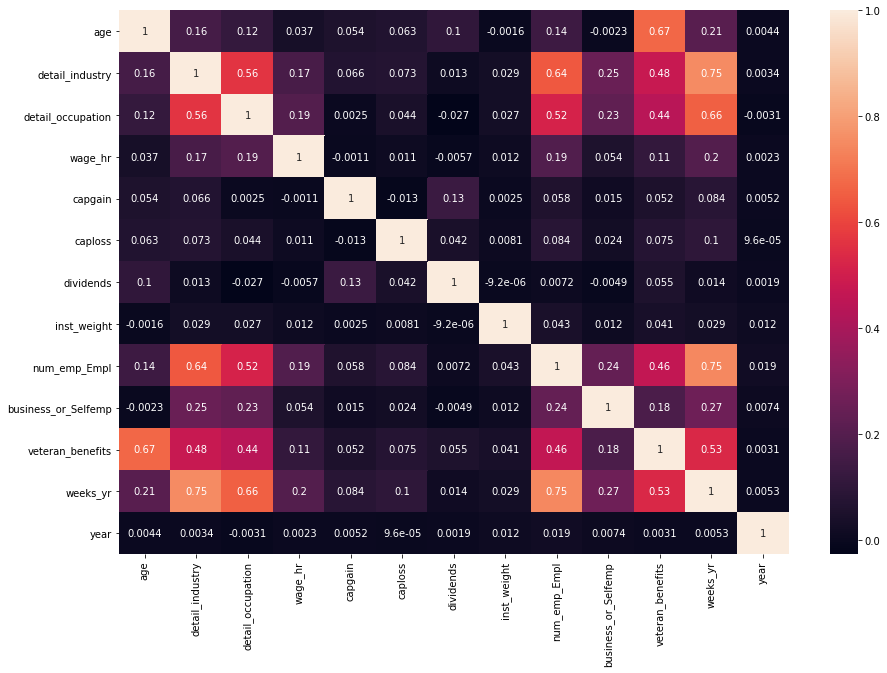

In [167]:
#correlation matrix

plt.figure(figsize=(15,10))
sns.heatmap(df.drop(['income'],axis=1).corr(),annot=True) #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()
#detail_industry predictor shows strong correlations with other predictors (weeks_yr, num_emp_Empl)


,age,detail_industry,detail_occupation,wage_hr,capgain,caploss,dividends,inst_weight,num_emp_Empl,business_or_Selfemp,veteran_benefits,weeks_yr,year,income
age,1.000000,0.157831,0.117422,0.036940,0.053592,0.063353,0.104978,-0.001610,0.140895,-0.002263,0.674845,0.206191,0.004405,0.135724
detail_industry,0.157831,1.000000,0.563491,0.165979,0.066016,0.072586,0.012773,0.029388,0.642095,0.252693,0.476479,0.754471,0.003434,0.196189
detail_occupation,0.117422,0.563491,1.000000,0.194498,0.002534,0.043680,-0.026727,0.027047,0.515552,0.228951,0.438683,0.655612,-0.003136,0.013413
wage_hr,0.036940,0.165979,0.194498,1.000000,-0.001082,0.010993,-0.005731,0.012353,0.191542,0.054051,0.113095,0.195687,0.002284,0.024528
capgain,0.053592,0.066016,0.002534,-0.001082,1.000000,-0.012700,0.131476,0.002549,0.058015,0.015048,0.051530,0.083549,0.005244,0.240725
caploss,0.063353,0.072586,0.043680,0.010993,-0.012700,1.000000,0.042427,0.008052,0.084255,0.024115,0.075392,0.100761,0.000096,0.147417
dividends,0.104978,0.012773,-0.026727,-0.005731,0.131476,0.042427,1.000000,-0.000009,0.007206,-0.004885,0.054585,0.013823,0.001913,0.175779
inst_weight,-0.001610,0.029388,0.027047,0.012353,0.002549,0.008052,-0.000009,1.000000,0.042778,0.012328,0.040507,0.029240,0.011765,0.014463
num_emp_Empl,0.140895,0.642095,0.515552,0.191542,0.058015,0.084255,0.007206,0.042778,1.000000,0.240552,0.463337,0.747301,0.018778,0.222683
business_or_Selfemp,-0.002263,0.252693,0.228951,0.054051,0.015048,0.024115,-0.004885,0.012328,0.240552,1.000000,0.177449,0.265871,0.007379,0.040472


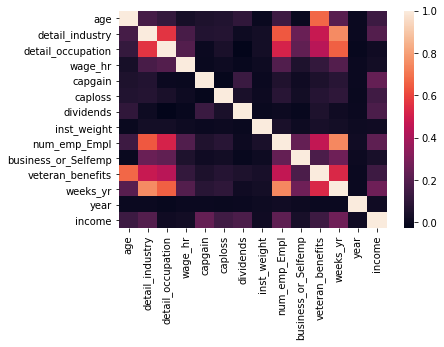

In [168]:
#Correlation Matrix for understanding the correlations with 'income'

corr = df.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

corr

#detail_industry, num_emp_Emp, weeks_yr,capgain have a correlation comparable with respect to others

In [169]:
# Overview of summary (above 50,000  V.S. below 50,000)
income_Summary = df.groupby('income')
income_Summary.mean()

#average stats for person earning above and below 50,000

#for a person who earns below 50,0000
#average stats 
#age: 33.71 years wage_hr:53.69 capgain: 143.84 caploss:27.00 dividends: 107.817, weeks_yr=21.52


#for a person who earns above 50,000 
#average
#age: 46.26 yrs #wage_hr: 81.64 #weeks_yr: 48.06 

,age,detail_industry,detail_occupation,wage_hr,capgain,caploss,dividends,inst_weight,num_emp_Empl,business_or_Selfemp,veteran_benefits,weeks_yr,year
income,,,,,,,,,,,,,
0,33.715106,14.440649,11.256744,53.692813,143.848782,27.003874,107.817094,1736.683484,1.820717,0.169675,1.483964,21.527878,94.497766
1,46.266193,29.132450,12.060330,81.640284,4830.930060,193.139557,1553.448070,1796.256279,4.003715,0.262559,1.981344,48.069617,94.528428


In [170]:
#exploring some continuous predictors 
#1. age
# mean age of the population is 34.49 yrs and maximum age is 90 this can be used to calculate the IQR and outlier detection process if any

df['age'].describe()


count    199522.000000
mean         34.494006
std          22.310785
min           0.000000
25%          15.000000
50%          33.000000
75%          50.000000
max          90.000000
Name: age, dtype: float64

[]

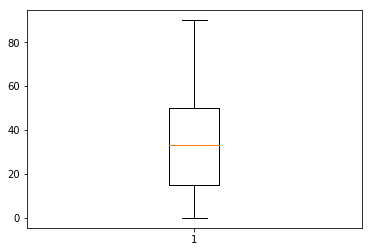

In [171]:
#box plot can be used to detect outliers # we cant find any with respect to age
plt.boxplot(df.age)
plt.plot()

In [172]:
#just making sure to validate our plot with calculation for detecting outliers with std deviations

df=df[np.abs(df.age-df.age.mean())<=(3*df.age.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.

#including only finite values for age

df = df[np.isfinite(df['age'])]

[]

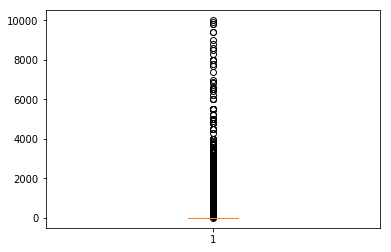

In [173]:
#2.Exploring wages per hour variable
#evidence of outliers
plt.boxplot(df.wage_hr)
plt.plot()

In [174]:
#stats

df['wage_hr'].describe()

count    199522.000000
mean         55.427186
std         274.897115
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        9999.000000
Name: wage_hr, dtype: float64

In [175]:
#outlier detection and removal
df=df[np.abs(df.wage_hr-df.wage_hr.mean())<=(3*df.wage_hr.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
df = df[np.isfinite(df['wage_hr'])]

[]

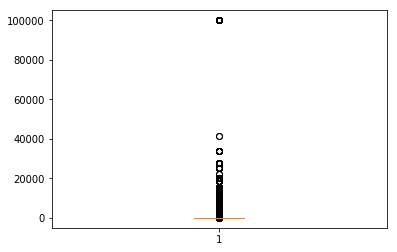

In [176]:
#3. Exploring capital gains
#evidence of outliers

plt.boxplot(df.capgain)
plt.plot()



In [177]:
#Capital gain stats
df['capgain'].describe()

count    194555.000000
mean        434.251343
std        4727.422040
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       99999.000000
Name: capgain, dtype: float64

In [178]:
#Removing outliers 

df=df[np.abs(df.capgain-df.capgain.mean())<=(3*df.capgain.std())]
df = df[np.isfinite(df['capgain'])]


[]

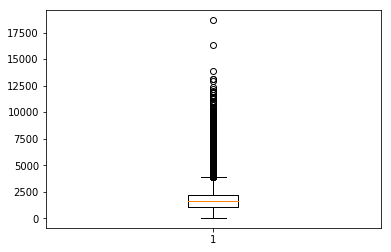

In [179]:
#4. Exploring instance weight
#outliers are detected

plt.boxplot(df.inst_weight)
plt.plot()

In [180]:
#capital loss stats

df['inst_weight'].describe()

count    193120.000000
mean       1738.629365
std         993.829378
min          37.870000
25%        1060.100000
50%        1616.190000
75%        2185.822500
max       18656.300000
Name: inst_weight, dtype: float64

In [181]:
#remove outliers and nan
df=df[np.abs(df.inst_weight-df.inst_weight.mean())<=(3*df.inst_weight.std())]
df = df[np.isfinite(df['inst_weight'])]


[]

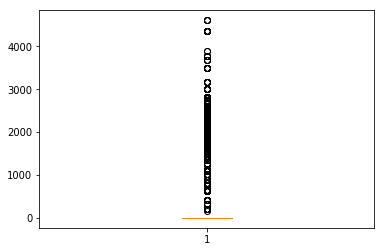

In [182]:
#5.Exploring capital loss
#outliers are detected

plt.boxplot(df.caploss)
plt.plot()

In [183]:
#remove outliers and nan
df=df[np.abs(df.caploss-df.caploss.mean())<=(3*df.caploss.std())]
df = df[np.isfinite(df['caploss'])]


[]

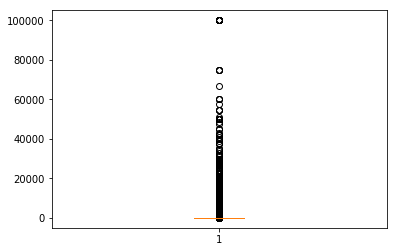

In [184]:
#6. Exploring dividends
#outliers are detected
plt.boxplot(df.dividends)
plt.plot()



In [185]:
#outlier removal
df=df[np.abs(df.dividends-df.dividends.mean())<=(3*df.dividends.std())]
df = df[np.isfinite(df['dividends'])]

[]

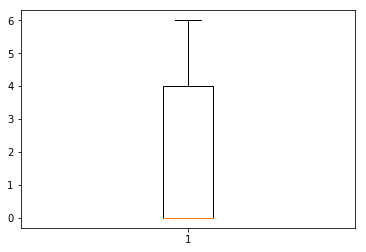

In [186]:
#7.Exploring number of persons worked for the employer
plt.boxplot(df.num_emp_Empl)
plt.plot()


In [187]:
#number of employers

df['num_emp_Empl'].describe()

count    186086.000000
mean          1.850171
std           2.333085
min           0.000000
25%           0.000000
50%           0.000000
75%           4.000000
max           6.000000
Name: num_emp_Empl, dtype: float64

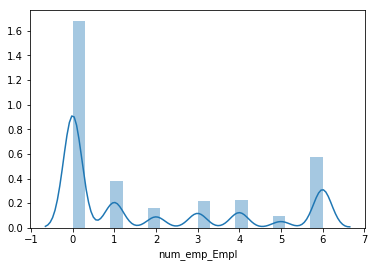

In [188]:
#kde plot and no evidence of outliers

sns.distplot(df.num_emp_Empl, bins=20, kde=True, rug=False)

[]

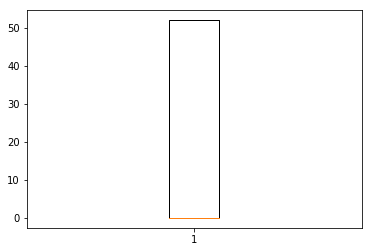

In [189]:
#8. Exploring number of weeks worked in a year

plt.boxplot(df.weeks_yr)
plt.plot()



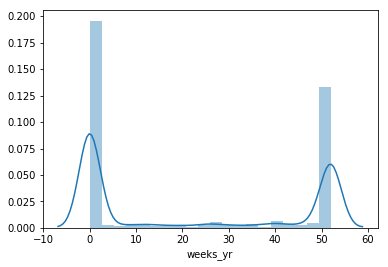

In [190]:
#kde plot for weeks worked

sns.distplot(df.weeks_yr, bins=20, kde=True, rug=False)


In [191]:
#removing outliers as we see some values below 0
df=df[np.abs(df.weeks_yr-df.weeks_yr.mean())<=(3*df.weeks_yr.std())]


In [192]:
#stats
#number of weeks worked in a year by the employee

df['weeks_yr'].describe()

count    186086.000000
mean         21.954182
std          24.243315
min           0.000000
25%           0.000000
50%           0.000000
75%          52.000000
max          52.000000
Name: weeks_yr, dtype: float64

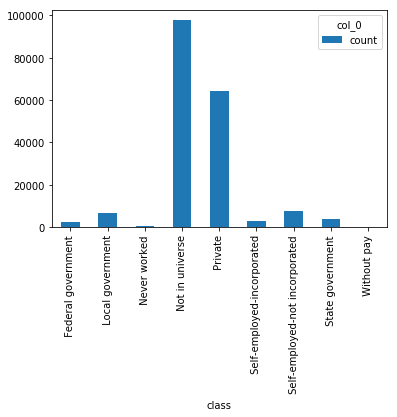

In [193]:
#Exploring some categorical variables
#1.Class variable

cross_tab = pd.crosstab(index = df["class"],           # crosstab and count
                             columns="count")          # plot 
cross_tab.plot.bar()

#Not in universe:the observations were not part of the sample or missing

In [194]:
#counts of categories in classes
print (cross_tab.sum(), "\n")   # Sum the counts
print (cross_tab.shape, "\n")   # Check number of rows and cols
cross_tab.iloc[1:8]   

(col_0
count    186086
dtype: int64, '\n')
((9, 1), '\n')


col_0,count
class,
Local government,6913
Never worked,434
Not in universe,97762
Private,64064
Self-employed-incorporated,2773
Self-employed-not incorporated,7798
State government,3763


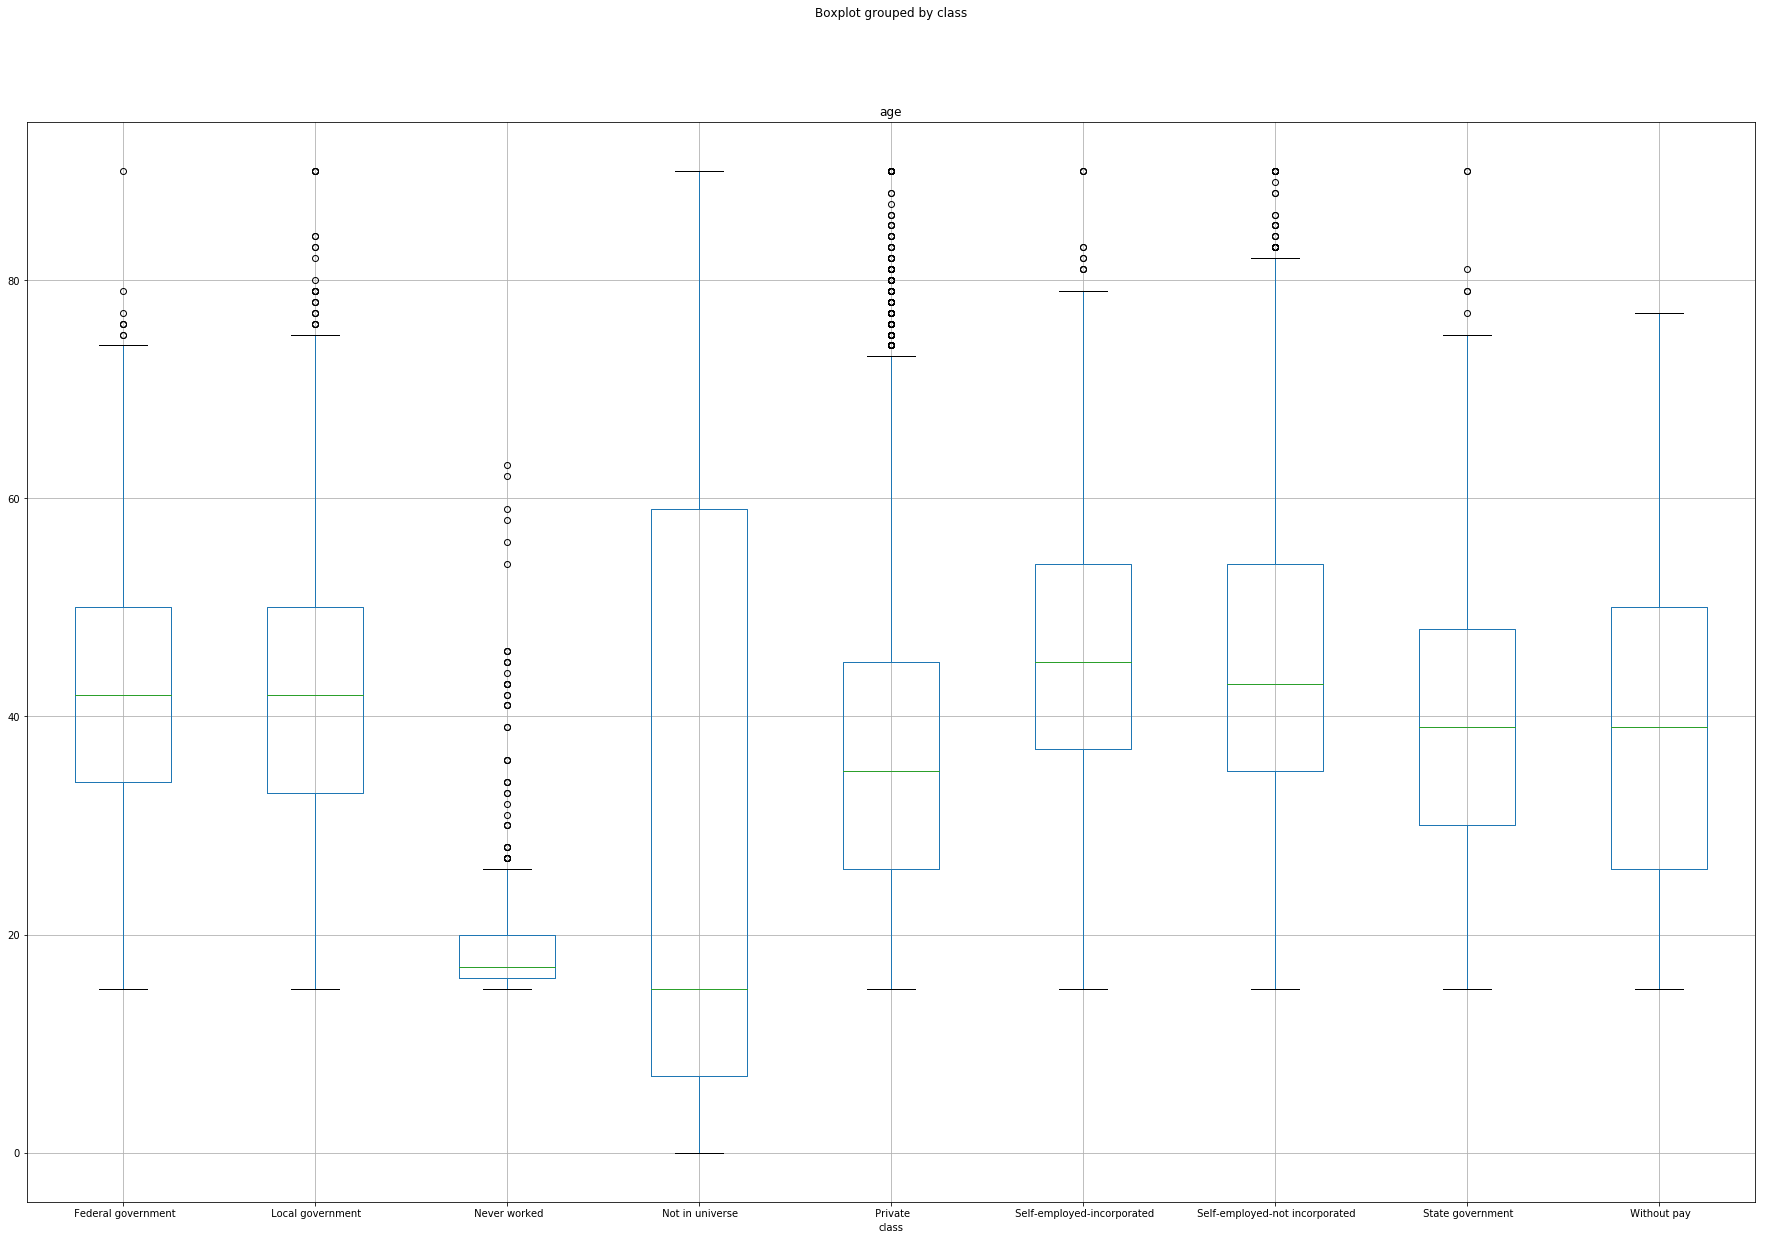

In [195]:
#bivariate analysis of Age and class
df.boxplot(column="age",                # Column to plot
                 by= "class",          # Column to split upon
                 figsize= (30,20))      # Figure size

#people who have never worked are below the age of 20 which implicates their income


In [196]:
#tabling class and income
grouped = df.groupby(['class','income'])
grouped.size()

class                            income
 Federal government              0          1971
                                 1           449
 Local government                0          6245
                                 1           668
 Never worked                    0           432
                                 1             2
 Not in universe                 0         97205
                                 1           557
 Private                         0         58662
                                 1          5402
 Self-employed-incorporated      0          2020
                                 1           753
 Self-employed-not incorporated  0          7016
                                 1           782
 State government                0          3392
                                 1           371
 Without pay                     0           159
dtype: int64

In [197]:
#making the picture simple
table = pd.crosstab(index=df["income"], 
                          columns=df["class"])
table

class,Federal government,Local government,Never worked,Not in universe,Private,Self-employed-incorporated,Self-employed-not incorporated,State government,Without pay
income,,,,,,,,,
0,1971,6245,432,97205,58662,2020,7016,3392,159
1,449,668,2,557,5402,753,782,371,0


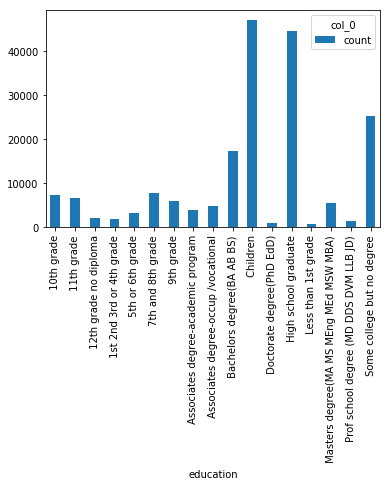

In [198]:
#exploring Education of the individuals

cross_tab = pd.crosstab(index = df["education"],  
                              columns="count") 
cross_tab.plot.bar()


In [199]:
#tabling education and class

table = pd.crosstab(index=df["education"], 
                          columns=df["class"])
table

class,Federal government,Local government,Never worked,Not in universe,Private,Self-employed-incorporated,Self-employed-not incorporated,State government,Without pay
education,,,,,,,,,
10th grade,29,130,88,4120,2525,46,245,53,9
11th grade,30,151,66,3056,2936,49,228,44,6
12th grade no diploma,12,45,14,921,922,17,74,24,2
1st 2nd 3rd or 4th grade,1,23,4,1123,558,2,30,7,1
5th or 6th grade,8,25,3,1851,1188,16,88,7,3
7th and 8th grade,15,93,48,5786,1446,38,283,30,14
9th grade,13,87,108,3923,1674,31,170,17,9
Associates degree-academic program,140,251,2,807,2213,112,222,130,3
Associates degree-occup /vocational,96,279,3,1026,2740,95,331,177,7


In [200]:
#education and income

table = pd.crosstab(index=df["education"], 
                          columns=df["income"])
table

#high school graduates and children are most in number
#PHD graduates still earn less than 50,000
#high school graduates who earn >50,000 are higher than phds

income,0,1
education,,
10th grade,7203,42
11th grade,6507,59
12th grade no diploma,2004,27
1st 2nd 3rd or 4th grade,1737,12
5th or 6th grade,3171,18
7th and 8th grade,7695,58
9th grade,6003,29
Associates degree-academic program,3563,317
Associates degree-occup /vocational,4453,301


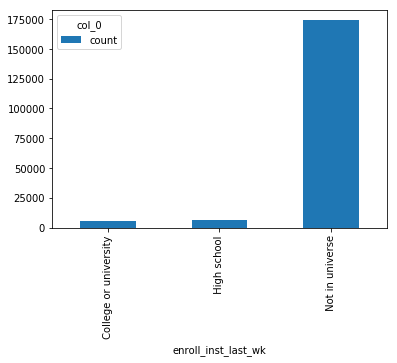

In [201]:
#Enrollment in an institution last year
cross_tab = pd.crosstab(index = df["enroll_inst_last_wk"],columns="count")      
cross_tab.plot.bar()


In [202]:
#tabling it 
#not in universe : misreported or not filled up in the data
print (cross_tab.sum(), "\n")   
print (cross_tab.shape, "\n") 
cross_tab.iloc[0:3]  

(col_0
count    186086
dtype: int64, '\n')
((3, 1), '\n')


col_0,count
enroll_inst_last_wk,
College or university,5437
High school,6710
Not in universe,173939


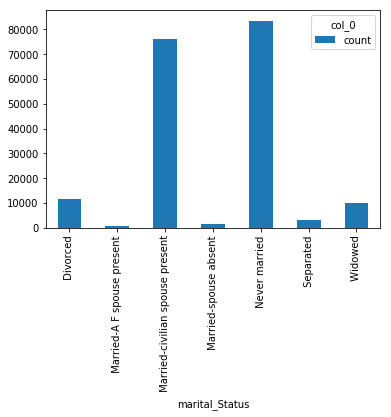

In [203]:
#exploring marital status

cross_tab = pd.crosstab(index = df["marital_Status"],columns="count")      
cross_tab.plot.bar()


In [204]:
#tabling
print (cross_tab.sum(), "\n")  
print (cross_tab.shape, "\n")   
cross_tab.iloc[0:8]  
#never married includes Major share of our children observations

(col_0
count    186086
dtype: int64, '\n')
((7, 1), '\n')


col_0,count
marital_Status,
Divorced,11417
Married-A F spouse present,620
Married-civilian spouse present,76048
Married-spouse absent,1418
Never married,83537
Separated,3199
Widowed,9847


In [205]:
#with respect to income /marital status 
table = pd.crosstab(index=df["income"],columns=df["marital_Status"])
table

#married spouse present dominates class '1' is this family income?

marital_Status,Divorced,Married-A F spouse present,Married-civilian spouse present,Married-spouse absent,Never married,Separated,Widowed
income,,,,,,,
0,10609,609,69082,1350,82720,3078,9654
1,808,11,6966,68,817,121,193


In [206]:
#race variable exploration with income

table = pd.crosstab(index=df["income"],columns=df["race"])

table

#clearly class '1' (>50,000)dominated by observations from white race


race,Amer Indian Aleut or Eskimo,Asian or Pacific Islander,Black,Other,White
income,,,,,
0,2115,5180,18569,3476,147762
1,35,316,408,71,8154


In [207]:
#origin variable with income
table = pd.crosstab(index=df["income"],columns=df["origin"])
table

#american origin people dominate the class'1'

origin,All other,Central or South American,Chicano,Cuban,Do not know,Mexican (Mexicano),Mexican-American,NA,Other Spanish,Puerto Rican
income,,,,,,,,,,
0,150854,3713,286,1044,284,6956,7669,786,2340,3170
1,8508,63,3,47,4,70,132,44,62,51


In [208]:
#income vs sex
#dominated by males

table = pd.crosstab(index=df["income"],columns=df["sex"])

table

sex,Female,Male
income,,
0,97031,80071
1,2047,6937


In [209]:
#income with previous region
#cant include this variable as most of the observations are Not in universe
table = pd.crosstab(index=df["income"],columns=df["prev_region"])

table

prev_region,Abroad,Midwest,Northeast,Not in universe,South,West
income,,,,,,
0,485,3274,2441,162711,4482,3709
1,14,80,109,8518,142,121


In [210]:
#filed taxes? with income
table = pd.crosstab(index=df["income"],columns=df["tax_stat"])
table

#joint incomes have a great contribution for the class 1

tax_stat,Head of household,Joint both 65+,Joint both under 65,Joint one under 65 & one 65+,Nonfiler,Single
income,,,,,,
0,6511,7366,53733,3333,74283,31876
1,351,258,6512,196,35,1632


In [211]:
#Observations who are self employed or business or belong to other category

table = pd.crosstab(index=df["income"],columns=df["business_or_Selfemp"])

table

business_or_Selfemp,0,1,2
income,,,
0,161500,1900,13702
1,7597,436,951


In [212]:
#replace the 'not in universe' value with -999 with regex

df=df.replace(to_replace='Not', value=-999, regex=True)

#replace -999 with nan for interpretation
df=df.replace(-999, np.nan)


In [213]:
#checking nulls now
df.isnull().sum()

age                         0
class                   97762
detail_industry             0
detail_occupation           0
education                   0
wage_hr                     0
enroll_inst_last_wk    173939
marital_Status              0
major_industry          98196
major_occupation        98196
race                        0
origin                      0
sex                         0
mem_laborUnion         172864
reason_unemp           180275
emp_stat                25728
capgain                     0
caploss                     0
dividends                   0
tax_stat                    0
prev_region            171229
prev_state             171229
dfamily_stat            12124
shousehold_stat             0
inst_weight                 0
mig_msa                  1913
mig_in_reg               1499
veteran_benefits         1499
inHouse_oneyr           94343
mig_prev_sun            78385
num_emp_Empl                0
fam_under_18           131324
father_birth                0
mother_bir

In [214]:
#dropping the columns where missing value is more than 30%

df.isnull().sum()>=0.3*len(df)

age                    False
class                   True
detail_industry        False
detail_occupation      False
education              False
wage_hr                False
enroll_inst_last_wk     True
marital_Status         False
major_industry          True
major_occupation        True
race                   False
origin                 False
sex                    False
mem_laborUnion          True
reason_unemp            True
emp_stat               False
capgain                False
caploss                False
dividends              False
tax_stat               False
prev_region             True
prev_state              True
dfamily_stat           False
shousehold_stat        False
inst_weight            False
mig_msa                False
mig_in_reg             False
veteran_benefits       False
inHouse_oneyr           True
mig_prev_sun            True
num_emp_Empl           False
fam_under_18            True
father_birth           False
mother_birth           False
birth_country 

In [215]:
#columns to drop are class, enroll_inst_last_wk,major_industry, major_occupation, mem_labor_union,readon_unemp, prev_region, prev_state, inHouse_oneyr,
#mig_prev_sun, fam_under_18, veteran_ques,mig_msa

#13 columns to be dropped

In [216]:
#check for nulls in migration column
#? dominates the class count and can be set as missing value
df['mig_msa'].value_counts()


 ?                   92844
 Nonmover            76886
 MSA to MSA           9907
 NonMSA to nonMSA     2701
 MSA to nonMSA         764
 NonMSA to MSA         576
 Abroad to MSA         423
 Abroad to nonMSA       72
Name: mig_msa, dtype: int64

In [217]:
#origin column exploration

df['origin'].value_counts()

 All other                    159362
 Mexican-American               7801
 Mexican (Mexicano)             7026
 Central or South American      3776
 Puerto Rican                   3221
 Other Spanish                  2402
 Cuban                          1091
 NA                              830
 Chicano                         289
 Do not know                     288
Name: origin, dtype: int64

In [218]:
#emp_stat column counts
df['emp_stat'].value_counts()

 Children or Armed Forces              116952
 Full-time schedules                    35964
 PT for non-econ reasons usually FT      2916
 Unemployed full-time                    2214
 PT for econ reasons usually PT          1055
 Unemployed part- time                    796
 PT for econ reasons usually FT           461
Name: emp_stat, dtype: int64

In [219]:
#dropping the columns from our observations
df.drop(['class','enroll_inst_last_wk','major_industry','major_occupation','mem_laborUnion','reason_unemp','prev_region','prev_state','inHouse_oneyr','mig_prev_sun','fam_under_18','veteran_ques','mig_msa'],inplace=True,axis=1)


In [220]:
#create a copy of data

X=df

In [221]:
#including only predictors

#drop the target variable
X=df.drop('income', axis=1, level=None, inplace=False, errors='raise')

#origin column dominated by all other category more than 60% of the class 

X=X.drop('origin', axis=1, level=None, inplace=False, errors='raise')

#emp-stat column dominated by children or armed forces category more than 60% of the class 
X=X.drop('emp_stat', axis=1, level=None, inplace=False, errors='raise')

#similar to mig_msa column, mig_in_region column is dominated by 'missing values'

X=X.drop('mig_in_reg', axis=1, level=None, inplace=False, errors='raise')

#this doesnt add much weight to the prediction power
X=X.drop('veteran_benefits', axis=1, level=None, inplace=False, errors='raise')


#father and mother birth country cannot be related to income of our employee 
X=X.drop('father_birth', axis=1, level=None, inplace=False, errors='raise')
X=X.drop('mother_birth', axis=1, level=None, inplace=False, errors='raise')

#year can be dropped it doesnt give information about income
X=X.drop('year', axis=1, level=None, inplace=False, errors='raise')


#caploss  can be dropped as we already have capgain column

X=X.drop('caploss', axis=1, level=None, inplace=False, errors='raise')

#birth_country and citizenship will not add any value unless we have the visa status and drop the race column as well


X=X.drop('birth_country', axis=1, level=None, inplace=False, errors='raise')


X=X.drop('citizenship', axis=1, level=None, inplace=False, errors='raise')


X=X.drop('race', axis=1, level=None, inplace=False, errors='raise')



In [222]:
#final shape
X.shape

(186086, 16)

In [223]:
X.columns


Index([u'age', u'detail_industry', u'detail_occupation', u'education',
       u'wage_hr', u'marital_Status', u'sex', u'capgain', u'dividends',
       u'tax_stat', u'dfamily_stat', u'shousehold_stat', u'inst_weight',
       u'num_emp_Empl', u'business_or_Selfemp', u'weeks_yr'],
      dtype='object')

In [224]:
#encoding the categorical variables
#Auto encodes any dataframe column of type category or object.
def dummyEncode(dj):
        columnsToEncode = list(dj.select_dtypes(include=['category','object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                dj[feature] = le.fit_transform(dj[feature])
            except:
                print('Error encoding '+feature)
        return dj

In [225]:
X=dummyEncode(X)

In [226]:
y=df['income']

In [227]:
#import the model for Logistic regression
from sklearn.linear_model import LogisticRegression 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 0)

# Initialize logistic regression model
logis=LogisticRegression(random_state=42)

logis.fit(X_train, y_train) #fitting the model with the logistic Regression Model
#calculate the training and Testing score
logis_score_train = logis.score(X_train,y_train)
print("Training score: ", logis_score_train)
logis_score_test = logis.score(X_test,y_test)
print("Testing score: ", logis_score_test)

('Training score: ', 0.95201117768761589)
('Testing score: ', 0.95306034714385512)


In [228]:
# Using 10 fold Cross-Validation to train our Logistic Regression Model
kfold = model_selection.KFold(n_splits=10, random_state=0)
modelCV = LogisticRegression(class_weight = "balanced")
scoring = 'roc_auc'
results = model_selection.cross_val_score(modelCV, X, y, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))
print(results)

AUC: 0.919 (0.004)
[ 0.92479034  0.92115957  0.91334726  0.92083687  0.92073136  0.91816588
  0.92068213  0.91960909  0.92208621  0.90948068]


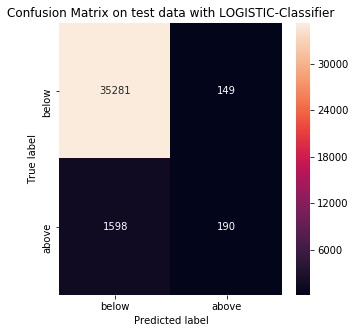

In [229]:
predictions = logis.predict(X_test)
cm = confusion_matrix(y_test, predictions) 
#The confusion matrix is used to evaluate the quality of the output of the DT-classifier  
#We use it in combination with the heatmap to have a more visual interpretation of the
#misclassified objects (employees).

#values are stored in the dataframe df_cm and reused to build the heatmap
df_cm = pd.DataFrame(cm, index = [i for i in np.unique(y)],  #create a dataframe for the unique entries in the target 
                  columns = [i for i in np.unique(y)])
 
plt.figure(figsize = (5,5)) #we plot the heatmap with a size of 5 to 5 inches
sns.heatmap(df_cm, annot=True,  #annot=True is printing the number in each category
         fmt='.0f', #without a decimal place because here are only whole numbers possible
         xticklabels = ["below", "above"] , yticklabels = ["below", "above"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix on test data with LOGISTIC-Classifier');

In [230]:
print metrics.confusion_matrix(y_test, predictions)
print metrics.classification_report(y_test, predictions)

[[35281   149]
 [ 1598   190]]
             precision    recall  f1-score   support

          0       0.96      1.00      0.98     35430
          1       0.56      0.11      0.18      1788

avg / total       0.94      0.95      0.94     37218



In [231]:
#Modeling with decision trees 
from sklearn.tree import DecisionTreeClassifier

In [232]:
dt = DecisionTreeClassifier(random_state=42) #instantiate the decision tree classifier
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [233]:
# on the training data
print('Score: ', dt.score(X_train, y_train))
print('Cross validation score, 10-fold cv: \n', cross_val_score(dt, X_train, y_train, cv=10)) 
#10-fold cross validation and  mean-value of 10-fold cross validation
print('Mean cross validation score: ', cross_val_score(dt,X_train,y_train,cv=10).mean())


('Score: ', 0.99999328263965392)
('Cross validation score, 10-fold cv: \n', array([ 0.93679473,  0.93464535,  0.93605159,  0.93611876,  0.93585007,
        0.93484248,  0.93698777,  0.93598012,  0.93557705,  0.93759237]))
('Mean cross validation score: ', 0.93604402967168843)


In [234]:
predictions = dt.predict(X_test) # and now use of the classifier on the testing set and instantiate for predicting

In [235]:
print metrics.confusion_matrix(y_test, predictions)
print metrics.classification_report(y_test, predictions)

[[34141  1289]
 [ 1086   702]]
             precision    recall  f1-score   support

          0       0.97      0.96      0.97     35430
          1       0.35      0.39      0.37      1788

avg / total       0.94      0.94      0.94     37218



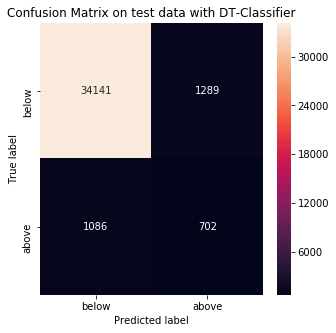

In [236]:
cm = confusion_matrix(y_test, predictions) 
#The confusion matrix is used to evaluate the quality of the output of the DT-classifier  
#We use it in combination with the heatmap to have a more visual interpretation of the
#misclassified objects (employees).

#values are stored in the dataframe df_cm and reused to build the heatmap
df_cm = pd.DataFrame(cm, index = [i for i in np.unique(y)],  #create a dataframe for the unique entries in the target 
                  columns = [i for i in np.unique(y)])
 
plt.figure(figsize = (5,5)) #we plot the heatmap with a size of 5 to 5 inches
sns.heatmap(df_cm, annot=True,  #annot=True is printing the number in each category
         fmt='.0f', #without a decimal place because here are only whole numbers possible
         xticklabels = ["below", "above"] , yticklabels = ["below", "above"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix on test data with DT-Classifier');

In [237]:
importances = dt.feature_importances_ 
#The relative rank (i.e. importance) of a feature used as a 
#decision node in a tree can be used to assess the relative importance of that feature (with respect 
#to the predictability of the target variable)
print("Feature importances: \n")
for f in range(len(X.columns)):  #for-loop with iteration = number of features
    print('•', X.columns[f], ":", importances[f]) #print each  line

Feature importances: 

('\xe2\x80\xa2', 'age', ':', 0.13799790321427777)
('\xe2\x80\xa2', 'detail_industry', ':', 0.087542090075382467)
('\xe2\x80\xa2', 'detail_occupation', ':', 0.13536428284375049)
('\xe2\x80\xa2', 'education', ':', 0.061447007969687641)
('\xe2\x80\xa2', 'wage_hr', ':', 0.0032257571425362733)
('\xe2\x80\xa2', 'marital_Status', ':', 0.01817004311987824)
('\xe2\x80\xa2', 'sex', ':', 0.041114953731410359)
('\xe2\x80\xa2', 'capgain', ':', 0.040336241212174079)
('\xe2\x80\xa2', 'dividends', ':', 0.075028704802679203)
('\xe2\x80\xa2', 'tax_stat', ':', 0.018524590697557186)
('\xe2\x80\xa2', 'dfamily_stat', ':', 0.017164471200634999)
('\xe2\x80\xa2', 'shousehold_stat', ':', 0.012806489037963456)
('\xe2\x80\xa2', 'inst_weight', ':', 0.2109037249835633)
('\xe2\x80\xa2', 'num_emp_Empl', ':', 0.041516532205124239)
('\xe2\x80\xa2', 'business_or_Selfemp', ':', 0.018274244375643935)
('\xe2\x80\xa2', 'weeks_yr', ':', 0.080582963387736281)


In [238]:

#The grid search provided by GridSearchCV exhaustively 

#generates candidates from a grid of parameter values specified with the param_grid parameter.


param_grid = {'max_depth': np.arange(3, 10)} 

#Return evenly spaced values within a given interval.
#Values are generated within the half-open interval [start, stop) (in other words, the interval 
#including start but excluding stop). 

tree = GridSearchCV(dt, param_grid, cv = 10) 

#Exhaustive search over 
#specified parameter values; The parameters of the estimator used to apply these methods are 
#optimized by cross-validated grid-search over a parameter grid for an estimator. here 10 folds  

tree.fit( X_train, y_train ) #we adapt the model to our training data

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': array([3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [239]:
#Hyperparameters cannot be learned by fitting the model, that is why we  use 
#the method best_params_ for returning the best hyperparameter (equal to the best depth of the tree)
tree.best_params_

{'max_depth': 6}

In [240]:
tree.best_score_ #returning the best cross validated score for the classifier

0.95547061826584623

In [241]:
#Build Final Decision Tree Model
clf_tree = DecisionTreeClassifier( max_depth = 6 , random_state=42) #insert the calculated best hyperparameter
clf_tree.fit( X_train, y_train) #and fit the model again on the training data

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [242]:
#Now we use the configured classifier again to make predictions (target-variable) on our testing set   
tree_test_pred = pd.DataFrame( { 'actual':  y_test, 
                            'predicted': clf_tree.predict( X_test ) } )

In [243]:
metrics.accuracy_score( tree_test_pred.actual, tree_test_pred.predicted )
#In multilabel classification, this function computes subset accuracy: 
#the set of labels predicted for a sample must exactly match the corresponding 
#set of labels in actual.

0.95555913805148052

In [86]:
#comparing logistic and decision trees I choose to go with the logistic which has better precision and recall when compared
#to decision tree.

#now applying the model on the test set

In [88]:
#for the test set

#drop the columns 
df1.drop(['class','enroll_inst_last_wk','major_industry','major_occupation','mem_laborUnion','reason_unemp','prev_region','prev_state','inHouse_oneyr','mig_prev_sun','fam_under_18','veteran_ques','mig_msa'],inplace=True,axis=1)


In [142]:
#test features

X_test=df1

In [143]:
#extra columns to be dropped 

#including only predictors

#drop the target variable
X_test=df1.drop('income', axis=1, level=None, inplace=False, errors='raise')

#origin column dominated by all other category more than 60% of the class 

X_test=X_test.drop('origin', axis=1, level=None, inplace=False, errors='raise')

#emp-stat column dominated by children or armed forces category more than 60% of the class 
X_test=X_test.drop('emp_stat', axis=1, level=None, inplace=False, errors='raise')

#similar to mig_msa column, mig_in_region column is dominated by 'missing values'

X_test=X_test.drop('mig_in_reg', axis=1, level=None, inplace=False, errors='raise')

#this doesnt add much weight to the prediction power
X_test=X_test.drop('veteran_benefits', axis=1, level=None, inplace=False, errors='raise')


#father and mother birth country cannot be related to income of our employee 
X_test=X_test.drop('father_birth', axis=1, level=None, inplace=False, errors='raise')
X_test=X_test.drop('mother_birth', axis=1, level=None, inplace=False, errors='raise')

#year can be dropped it doesnt give information about income
X_test=X_test.drop('year', axis=1, level=None, inplace=False, errors='raise')

X_test=X_test.drop('mig_within_reg', axis=1, level=None, inplace=False, errors='raise')

#birth_country and citizenship will not add any value unless we have the visa status and drop the race column as well


X_test=X_test.drop('birth_country', axis=1, level=None, inplace=False, errors='raise')


X_test=X_test.drop('citizenship', axis=1, level=None, inplace=False, errors='raise')


X_test=X_test.drop('race', axis=1, level=None, inplace=False, errors='raise')


X_test=X_test.drop('caploss', axis=1, level=None, inplace=False, errors='raise')



In [144]:

#target variable test set
y_test=df1['income']

In [145]:
#apply on features of  test set


X_test=dummyEncode(X_test)

In [147]:
# Initialize logistic regression model
logis=LogisticRegression(random_state=21)

result=logis.fit(X,y) #fitting the model with the logistic Regression Model


#calculate the training and Testing score
logis_score_train = logis.score(X,y)
print("Training score: ", logis_score_train)
logis_score_test = logis.score(X_test,y_test)
print("Testing score: ", logis_score_test)

('Training score: ', 0.9541126145975517)
('Testing score: ', 0.94562003187618404)


In [148]:
# examine the coefficients
pd.DataFrame(zip(X.columns, np.transpose(result.coef_)))
#increase in number of employees working for employer,age corresponds to an increase in probability in earning more than 50,000
#sex and weeks_yr does also correspond to increase in likelihood of earning more


,0,1
0,age,[0.028592659212]
1,detail_industry,[0.00739037343646]
2,detail_occupation,[-0.0557671928891]
3,education,[0.0310267391951]
4,wage_hr,[-0.00187189534616]
5,marital_Status,[-0.111430065388]
6,sex,[1.55547586892]
7,capgain,[0.00017294617986]
8,dividends,[0.000566568175277]
9,tax_stat,[-0.11655129464]


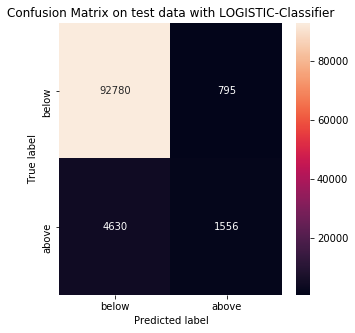

In [149]:
predictions = logis.predict(X_test)


cm = confusion_matrix(y_test, predictions) 
#The confusion matrix is used to evaluate the quality of the output of the DT-classifier  
#We use it in combination with the heatmap to have a more visual interpretation of the
#misclassified objects (employees).

#values are stored in the dataframe df_cm and reused to build the heatmap
df_cm = pd.DataFrame(cm, index = [i for i in np.unique(y)],  #create a dataframe for the unique entries in the target 
                  columns = [i for i in np.unique(y)])
 
plt.figure(figsize = (5,5)) #we plot the heatmap with a size of 5 to 5 inches
sns.heatmap(df_cm, annot=True,  #annot=True is printing the number in each category
         fmt='.0f', #without a decimal place because here are only whole numbers possible
         xticklabels = ["below", "above"] , yticklabels = ["below", "above"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix on test data with LOGISTIC-Classifier');

In [150]:
print metrics.confusion_matrix(y_test, predictions)
print metrics.classification_report(y_test, predictions)

[[92780   795]
 [ 4630  1556]]
             precision    recall  f1-score   support

          0       0.95      0.99      0.97     93575
          1       0.66      0.25      0.36      6186

avg / total       0.93      0.95      0.93     99761



('Area Under the Curve:', 0.91304128953203223)


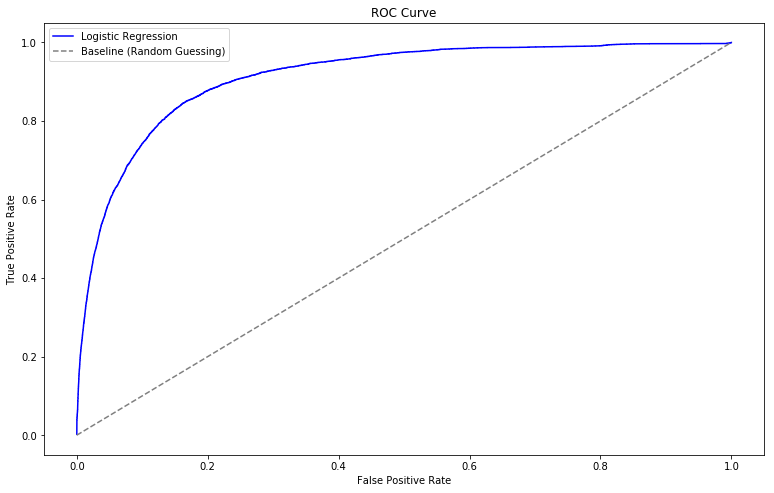

In [151]:
#we use ROC curve for visualization of the true positive rate(TPR) against the false positive rate(FPR)
from sklearn.metrics import roc_curve, roc_auc_score #import the modules for the curve and metrics
probabilities = logis.predict_proba(X_test) #To plot the curve, probability estimates are used
#and they are calculated with the logistic regression classifier
fpr, tpr, thresholds = roc_curve(y_test, probabilities[:,1]) #curve is calculated for the entries in 
#y_test against their calculated prediction with logistic regression classifier
#the roc curve functionality returns fpr, tpr, thresholds; for further information see:
#http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

rates = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr}) #the returned values 
#are saved in a dataframe

roc = plt.figure(figsize = (10,6))
rocax = roc.add_axes([0,0,1,1])
rocax.plot(fpr, tpr, color='b', label='Logistic Regression')
rocax.plot([0,1],[0,1],color='gray',ls='--',label='Baseline (Random Guessing)') #plot of angle bisectrix 
rocax.set_xlabel('False Positive Rate') #labeling x-axis
rocax.set_ylabel('True Positive Rate')  #labeling y-axis
rocax.set_title('ROC Curve')  #labeling the diagram itself
rocax.legend() # showing the legend

print('Area Under the Curve:', roc_auc_score(y_test, probabilities[:,1])) 
#calculating and printing AUC = Area Under the Curve

In [153]:
# Using 10 fold Cross-Validation to train our Logistic Regression Model
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=0)
modelCV = LogisticRegression(class_weight = "balanced")
scoring = 'roc_auc'
results = model_selection.cross_val_score(modelCV, X, y, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))
print(results)

AUC: 0.919 (0.004)
[ 0.92453491  0.92048492  0.9127534   0.92054419  0.92056826  0.91738015
  0.91984492  0.91917547  0.92183276  0.90875449]


In [155]:
#logistic regression : exploring different models
#1. scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_train_scaled = scaler.transform(X)
X_test_scaled = scaler.transform(X_test)

# Initialize logistic regression model
logis=LogisticRegression(random_state=201)

result=logis.fit(X,y) #fitting the model with the logistic Regression Model


#calculate the training and Testing score
logis_score_train = logis.score(X_train_scaled,y)
print("Training score: ", logis_score_train)
logis_score_test = logis.score(X_test_scaled,y_test)
print("Testing score: ", logis_score_test)

#accuracy drops

('Training score: ', 0.95172124716528916)
('Testing score: ', 0.93799180040296304)


In [158]:
#2. Logistic regression with L1 penalty and features scaled
# C=0.1 with L1 penalty
logreg = LogisticRegression(C=0.1, penalty='l1')
logreg.fit(X_train_scaled, y)
print logreg.coef_

#calculate the training and Testing score
logis_score_train = logreg.score(X_train_scaled,y)
print("Training score: ", logis_score_train)
logis_score_test = logreg.score(X_test_scaled,y_test)
print("Testing score: ", logis_score_test)

#accuracy still drops

[[ 0.68829593  0.13104278 -0.79584132  0.1484322  -0.20456631 -0.11803215
   0.79255016  0.16837965  0.22354168 -0.1372384   0.          0.18323511
   0.08033431  0.34297972 -0.0042794   1.63988153]]
('Training score: ', 0.95424696108251028)
('Testing score: ', 0.94561000791892624)


In [159]:
#3. Logistic regression with L2 penalty
# try C=0.1 with L2 penalty
logreg = LogisticRegression(C=0.1, penalty='l2')
logreg.fit(X_train_scaled, y)
print logreg.coef_

#calculate the training and Testing score
logis_score_train = logreg.score(X_train_scaled,y)
print("Training score: ", logis_score_train)
logis_score_test = logreg.score(X_test_scaled,y_test)
print("Testing score: ", logis_score_test)

#accuracy drops

[[ 0.6745407   0.13435804 -0.79308158  0.14870913 -0.20607258 -0.11816741
   0.78816757  0.16831847  0.22266561 -0.13465746 -0.03547499  0.21641133
   0.08102237  0.34240424 -0.00620027  1.60758705]]
('Training score: ', 0.9542308395043152)
('Testing score: ', 0.94558996000441053)


In [160]:
# pipeline of StandardScaler and LogisticRegression
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(StandardScaler(), LogisticRegression())

In [161]:
# grid search for best combination of C and penalty
from sklearn.grid_search import GridSearchCV
C_range = 10.**np.arange(-2, 3)
penalty_options = ['l1', 'l2']
param_grid = dict(logisticregression__C=C_range, logisticregression__penalty=penalty_options)
grid = GridSearchCV(pipe, param_grid, cv=10, scoring='log_loss')
grid.fit(X, y)


/home/ashish/miniconda2/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/home/ashish/miniconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/ashish/miniconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/ashish/miniconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/hom

/home/ashish/miniconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/ashish/miniconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/ashish/miniconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/ashish/miniconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/ashish/miniconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.p

/home/ashish/miniconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/ashish/miniconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/ashish/miniconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/ashish/miniconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/ashish/miniconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.p

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'logisticregression__penalty': ['l1', 'l2'], 'logisticregression__C': array([  1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, scoring='log_loss', verbose=0)

In [162]:
# print all log loss scores
grid.grid_scores_

[mean: -0.12446, std: 0.00235, params: {'logisticregression__penalty': 'l1', 'logisticregression__C': 0.01},
 mean: -0.12510, std: 0.00223, params: {'logisticregression__penalty': 'l2', 'logisticregression__C': 0.01},
 mean: -0.12424, std: 0.00249, params: {'logisticregression__penalty': 'l1', 'logisticregression__C': 0.10000000000000001},
 mean: -0.12426, std: 0.00247, params: {'logisticregression__penalty': 'l2', 'logisticregression__C': 0.10000000000000001},
 mean: -0.12424, std: 0.00251, params: {'logisticregression__penalty': 'l1', 'logisticregression__C': 1.0},
 mean: -0.12425, std: 0.00251, params: {'logisticregression__penalty': 'l2', 'logisticregression__C': 1.0},
 mean: -0.12425, std: 0.00251, params: {'logisticregression__penalty': 'l1', 'logisticregression__C': 10.0},
 mean: -0.12425, std: 0.00251, params: {'logisticregression__penalty': 'l2', 'logisticregression__C': 10.0},
 mean: -0.12425, std: 0.00251, params: {'logisticregression__penalty': 'l1', 'logisticregression__C'

In [163]:
# examine the best model
print grid.best_score_
print grid.best_params_

#The parameters were already tried.

-0.124244213163
{'logisticregression__penalty': 'l1', 'logisticregression__C': 0.10000000000000001}


In [164]:
#summary
#Sensitivity is 95.25% and specificity is 66.18%
#Model precision and recall for income below 50,000 prediction is 0.95,0.99
#Model precision and recall for income above 50,000 prediction is 0.66,0.25


In [165]:
#challenges:

#1.class imbalance
#Model was able to classify the individuals below 50k with a great precision
#this was not the case with the indiduals who earn above 50k
#2.Missing values: As the data had columns with more than 40% of the observations missing
#This effected the accuracy of the model and they were dropped because they were not part of the sample
#3. More relavant features required: such as years of experience, more information about workplace
#4.information about capital gain and losses directly impact earnings, years of investment can give us more insights